# Using the Compressor

2025-02-12

From the looks of the figures, the compressor function compresses the value range using a sigmoid like function. However, it has a much wider range than a usual logistic function.

/var/folders/_3/_n1c5rnx5pzd_v7dv5vg2_nr0000gn/T/ipykernel_34401/3396610537.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


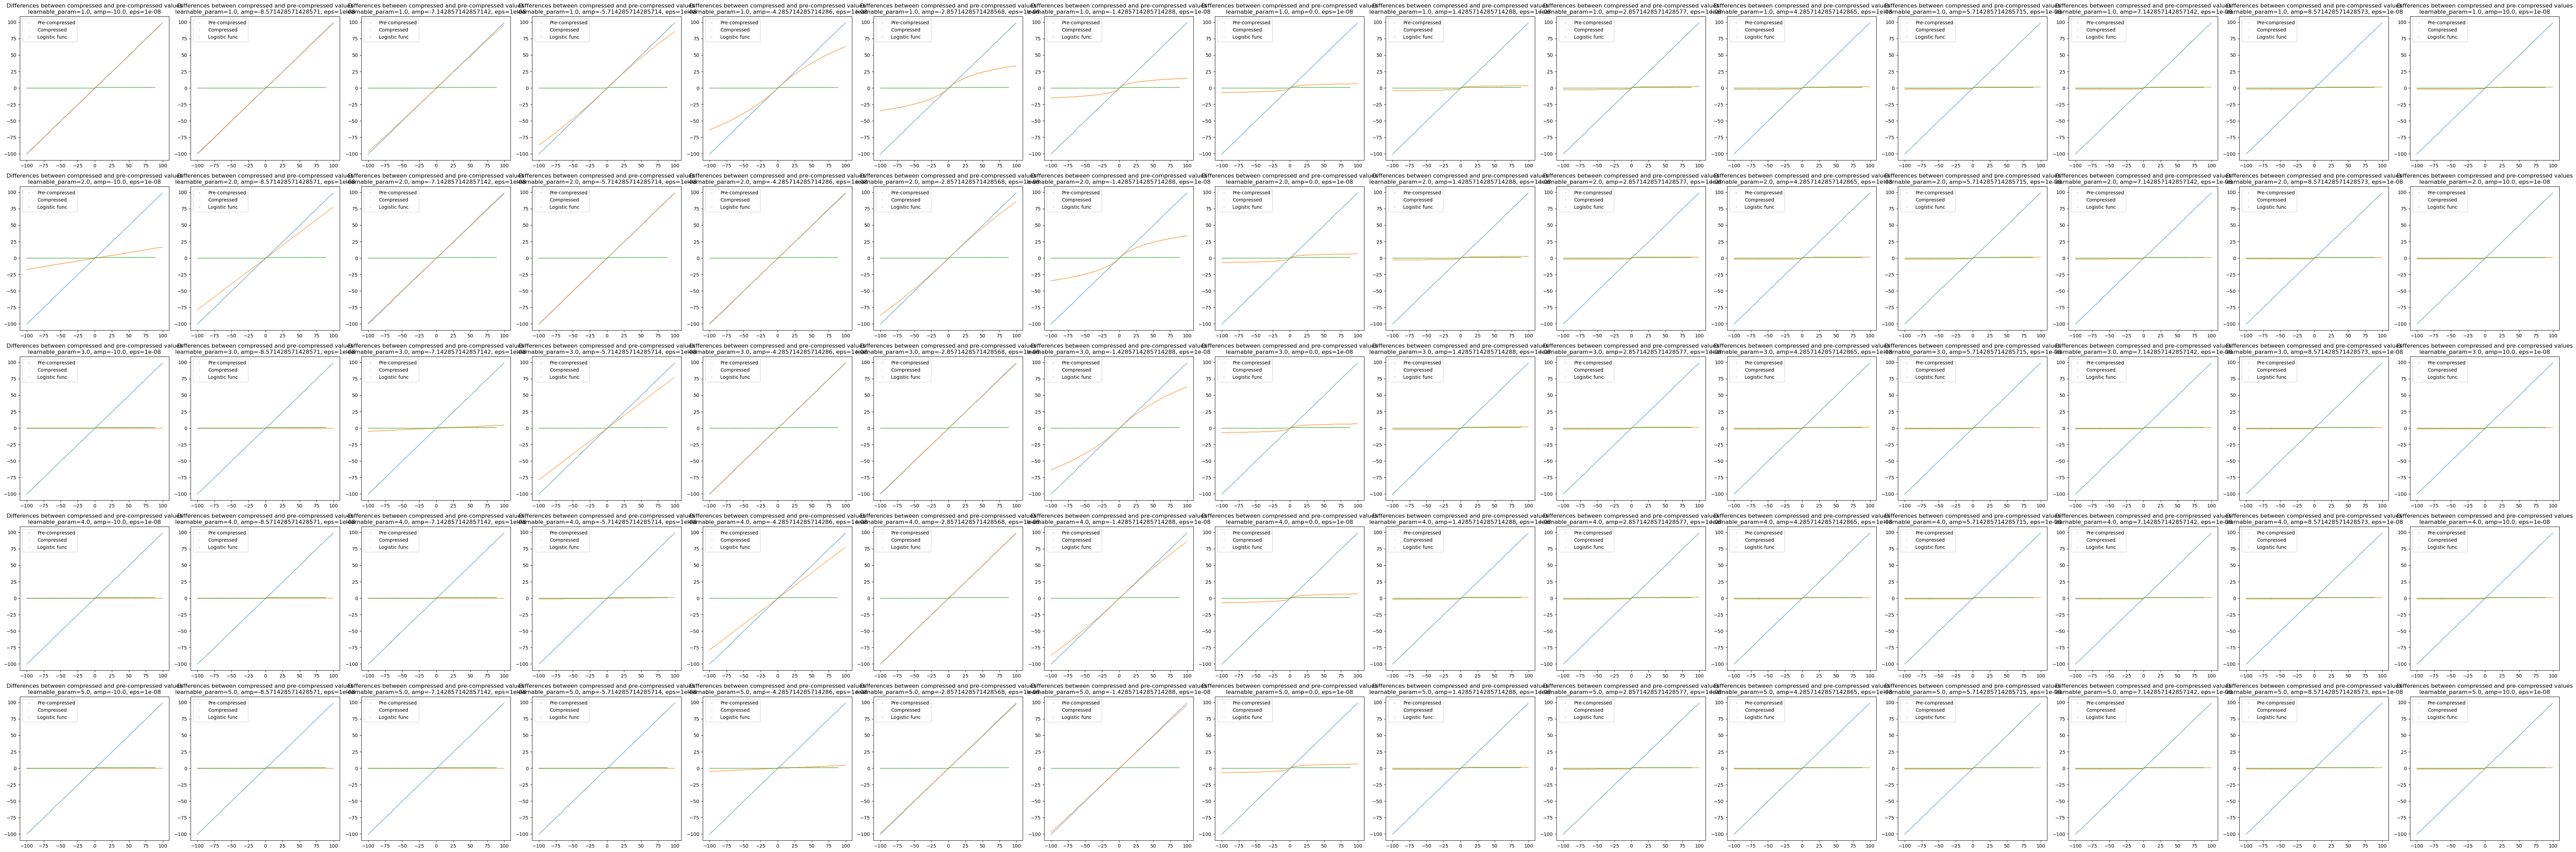

In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np

def compression_func(x, learnable_param, amp, eps=None):
    if eps is None: eps = 1e-8

    n_channels=len(x)

    slope = torch.tensor(learnable_param * amp)
    slope_ = torch.exp(slope)

    output = torch.sign(x) * torch.log(torch.abs(x) * slope_ + 1.0) / (torch.log(slope_ + 1.0) + eps)

    return output.squeeze()

def logistic_func(x):
    x = torch.tensor(x)
    x = torch.exp(x)
    # output = torch.log(x) / torch.log1p(x)
    output = x / (1+x)
    return output


def plot_diff(learnable_param=None, amp=None, eps=None, ax=None):
    start, stop = -100, 100
    inputs = torch.arange(start, stop, step=1)
    
    if ax is None: 
        fig, ax = plt.subplots()

    ax.set_title(f"Differences between compressed and pre-compressed values\nlearnable_param={learnable_param}, amp={amp}, eps={eps}")

    # Pre-compressed values
    outputs_1 = inputs
    ax.plot(inputs, outputs_1, ".", markersize=1, label="Pre-compressed")

    # Compressed values
    outputs_2 = compression_func(inputs, learnable_param=learnable_param, amp=amp, eps=eps)
    ax.plot(inputs, outputs_2, ".", markersize=1, label="Compressed")

    # Sigmoid func definition
    outputs_3 = logistic_func(inputs)
    ax.plot(inputs, outputs_3, ".", markersize=1, label="Logistic func")

    # Artists
    ax.legend()
    fig = ax.get_figure()

    fig.tight_layout()
    
    return fig


def plot_grid():
    learnable_params = np.linspace(1, 5, 5)
    amps = np.linspace(-10, 10, 15)
    eps = 1e-8

    nrows, ncols, inches, xyratio = len(learnable_params), len(amps), 5, 1
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*inches*xyratio, nrows*inches))

    coords = ((x, y) for x in range(len(learnable_params)) for y in range(len(amps)))
    
    for x, y in coords:
        plot_diff(learnable_param=learnable_params[x], amp=amps[y], eps=eps, ax=axs[x, y])

    fig.tight_layout()
    return fig

fig = plot_grid()
fig

fig.savefig("compressor_grid_search.svg")

